In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [4]:
# Carregar dados
data = pd.read_csv('data_/TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-09,22.366667,22.900000,22.098000,22.568666,22.568666,81493500
1,2019-01-10,22.293333,23.025999,22.119333,22.997999,22.997999,90846000
2,2019-01-11,22.806000,23.227333,22.584667,23.150667,23.150667,75586500
3,2019-01-14,22.825333,22.833332,22.266666,22.293333,22.293333,78709500
4,2019-01-15,22.333332,23.253332,22.299999,22.962000,22.962000,90849000


In [5]:
# Vamos utilizar apenas o fechamento das ações para simplificar
close_prices = data['Close'].values.reshape(-1, 1)

In [7]:
# Normalizar dados
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(close_prices)

In [8]:
# Função para criar sequências de dados
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [9]:
SEQ_LENGTH = 10

X, y = create_sequences(normalized_data, SEQ_LENGTH)

# Dividir os dados em treino e teste
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
# Construir o modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [11]:
# Treinar o modelo
model.fit(X_train, y_train, 
          epochs=100, batch_size=64, 
          validation_data=(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 2s 31ms/step - loss: 0.0725 - val_loss: 0.0040
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0078 - val_loss: 0.0034
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0010 - val_loss: 8.4861e-04
Epoch 5/100
14/14 [==============================] - 0s 15ms/step - loss: 7.8110e-04 - val_loss: 8.1450e-04
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 7.2773e-04 - val_loss: 7.1950e-04
Epoch 7/100
14/14 [==============================] - 0s 15ms/step - loss: 6.9219e-04 - val_loss: 6.6575e-04
Epoch 8/100
14/14 [==============================] - 0s 15ms/step - loss: 7.0954e-04 - val_loss: 7.1754e-04
Epoch 9/100
14/14 [==============================] - 0s 14ms/step - loss: 6.6831e-04 - val_loss: 7.6787e-04
Epoch 10/100
14/14 [==============================] - 0s

In [12]:
# Fazer previsões
y_pred = model.predict(X_test)
y_pred_transformed = scaler.inverse_transform(y_pred)
y_test_transformed = scaler.inverse_transform(y_test)

# Avaliar o modelo
mse = mean_squared_error(y_test_transformed, y_pred_transformed)
print(f"Mean Squared Error: {mse}")

7/7 [==============================] - 0s 3ms/step
Mean Squared Error: 79.75304240070055


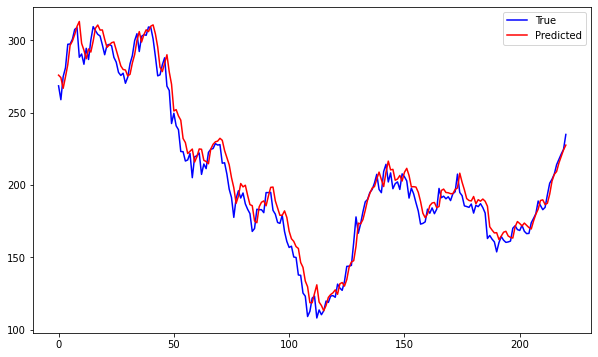

In [13]:
# Visualizar previsões vs valores reais
plt.figure(figsize=(10,6))
plt.plot(y_test_transformed, label='True', color='blue')
plt.plot(y_pred_transformed, label='Predicted', color='red')
plt.legend()
plt.show()